# Single-Path Impulse Geometry

This notebook implements the simplest non-trivial construction in
Impulse Geometry (IG): a single impulse-driven trajectory in ℝ².

Geometry is not prescribed. Instead, it emerges by integrating a local
impulse defined by intrinsic generator variables.

We work with:
- position x ∈ ℝ² (shape space)
- generator magnitude ρ
- generator orientation θ
- generative parameter s


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from iglab.core.state import State
from iglab.systems.single_path import SinglePathSystem

## Canonical Polar Impulse

This is the fundamental IG impulse map:

ẋ = ρ (cos θ, sin θ)


In [2]:
def impulse(state):
    """
    Polar impulse defined by generator variables (ρ, θ).
    """
    return state.rho * np.array([
        np.cos(state.theta),
        np.sin(state.theta)
    ])

## Initial State

- x → realized geometry
- ρ, θ → generator state
- s → evolution parameter


In [3]:
s0 = State(
    x=np.array([0.0, 0.0]),
    s=0.0,
    rho=1.0,
    theta=0.0
)

## Build the System

In [4]:
sys = SinglePathSystem(
    initial_state=s0,
    impulse_fn=impulse,
    dt=0.05
)

## Baseline: Constant θ → Straight Line

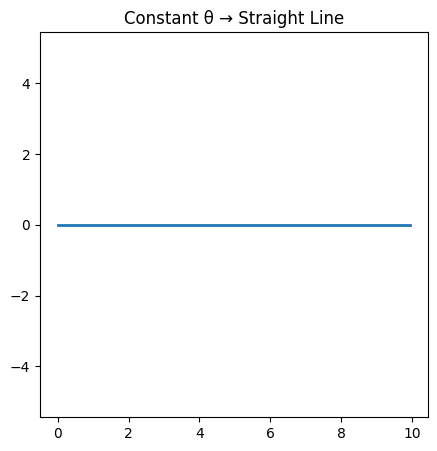

In [5]:
sys.run(200)
traj = np.array(sys.trajectory())

plt.figure(figsize=(5, 5))
plt.plot(traj[:, 0], traj[:, 1], lw=2)
plt.axis("equal")
plt.title("Constant θ → Straight Line")
plt.show()

## Reset System

In [6]:
s0 = State(
    x=np.array([0.0, 0.0]),
    s=0.0,
    rho=1.0,
    theta=0.0
)

sys = SinglePathSystem(
    initial_state=s0,
    impulse_fn=impulse,
    dt=0.05
)

## Generator-Driven Curvature (Correct Causal Ordering)

Generator variables evolve **before** geometric realization.

In [7]:
for _ in range(400):
    sys.state.theta += 0.05   # generator update (causal)
    sys.step()                # geometric realization

## Resulting Trajectory

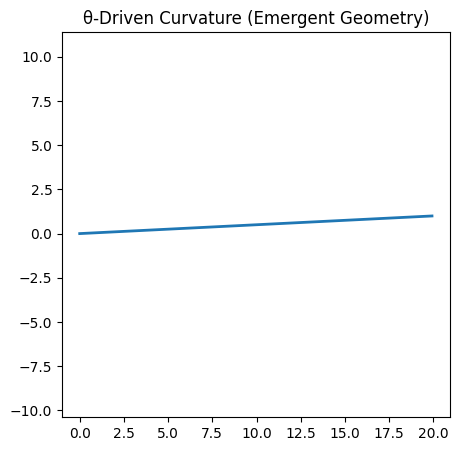

In [8]:
traj = np.array(sys.trajectory())

plt.figure(figsize=(5, 5))
plt.plot(traj[:, 0], traj[:, 1], lw=2)
plt.axis("equal")
plt.title("θ-Driven Curvature (Emergent Geometry)")
plt.show()

## Generator Variables

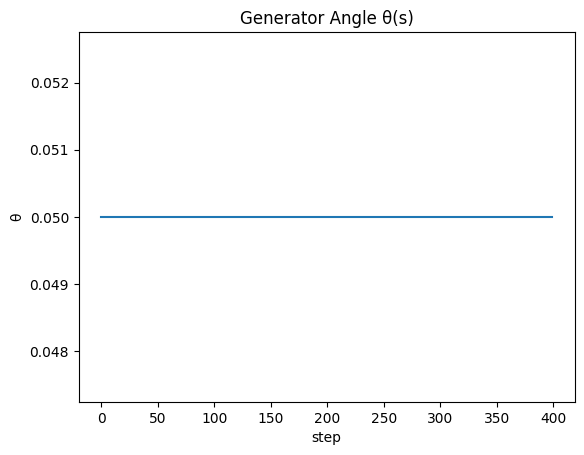

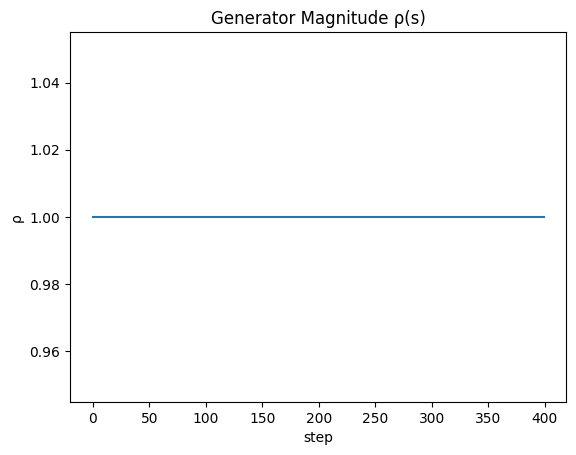

In [9]:
thetas = [s.theta for s in sys.history]
rhos = [s.rho for s in sys.history]

plt.figure()
plt.plot(thetas)
plt.xlabel("step")
plt.ylabel("θ")
plt.title("Generator Angle θ(s)")
plt.show()

plt.figure()
plt.plot(rhos)
plt.xlabel("step")
plt.ylabel("ρ")
plt.title("Generator Magnitude ρ(s)")
plt.show()

## Interpretation

- Geometry arises from integration, not declaration.
- Curvature is controlled by θ(s), not by geometric primitives.
- Generator variables evolve causally before realization.
- Geometry is an emergent record, not a driver.

**Causation lives in impulse space; geometry lives in shape space.**